In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error


In [56]:
#1. Data Loading & Preprocessing
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)



In [57]:
# Drop rows with missing values
data = data.dropna()

# Features (horsepower) and Target (mpg)
X = data[["horsepower"]].values
y = data["mpg"].values


In [58]:

#2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
#3. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

# Metrics
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)



In [60]:
#4. Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)



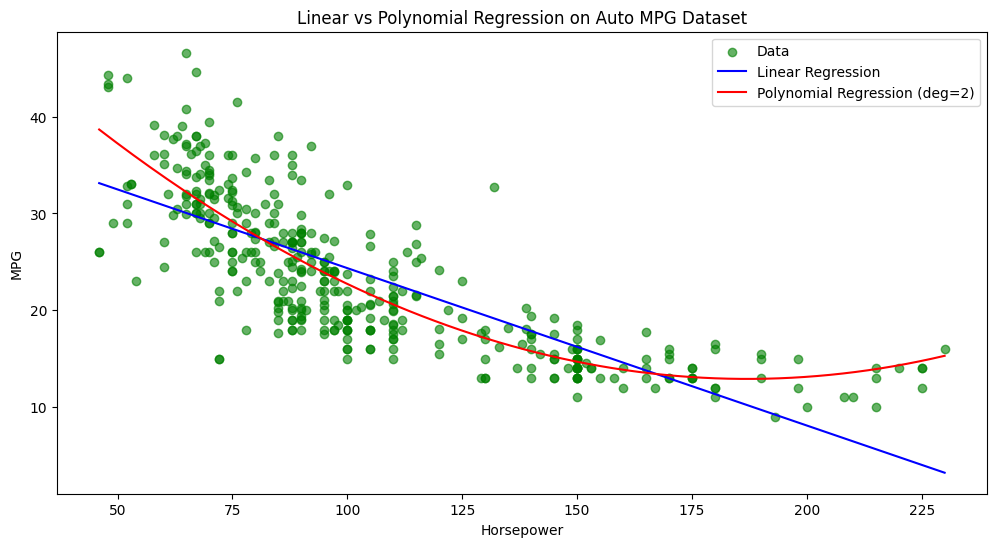

In [62]:
#5. Plotting
plt.figure(figsize=(12,6))

# Scatter data points
plt.scatter(X, y, color="green", alpha=0.6, label="Data")

# Linear fit line
X_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line_linear = lin_reg.predict(X_line)
plt.plot(X_line, y_line_linear, color="blue", label="Linear Regression")

# Polynomial fit curve
y_line_poly = poly_reg.predict(poly.transform(X_line))
plt.plot(X_line, y_line_poly, color="red", label="Polynomial Regression (deg=2)")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear vs Polynomial Regression on Auto MPG Dataset")
plt.legend()
plt.show()



In [63]:
#6. Results
print("Linear Regression R²:", r2_linear)


Linear Regression R²: 0.5659681822256185


In [64]:
print("Linear Regression MAE:", mae_linear)


Linear Regression MAE: 3.782512710126959


In [65]:
print("Polynomial Regression R²:", r2_poly)


Polynomial Regression R²: 0.6391701147013347


In [66]:
print("Polynomial Regression MAE:", mae_poly)

Polynomial Regression MAE: 3.264280823763114
